classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('forestfires.csv')

In [4]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [6]:
data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [7]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [8]:
##Dropping the month and day columns
data.drop(["month","day"],axis=1,inplace =True)

In [9]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


# convert the categorical to numerical

In [10]:
data['size_category']=data['size_category'].map({'small':0,'large':1})

In [11]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


(array([378.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

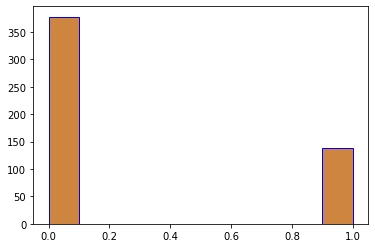

In [12]:
plt.hist(data['size_category'],facecolor ="peru",edgecolor ="blue")

In [33]:
data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

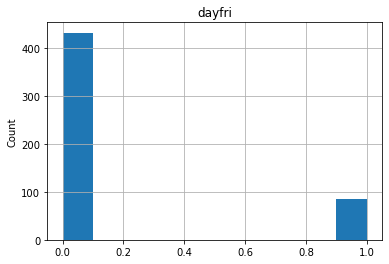

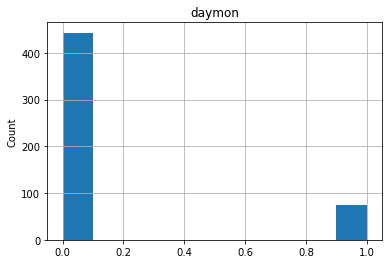

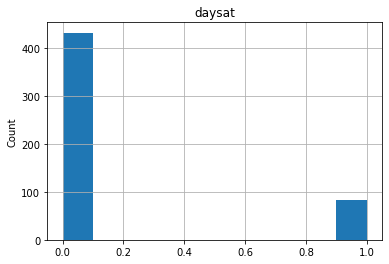

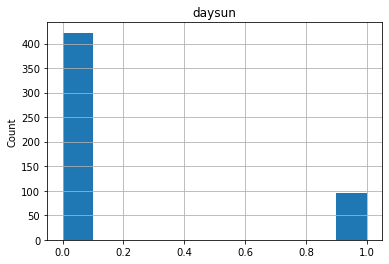

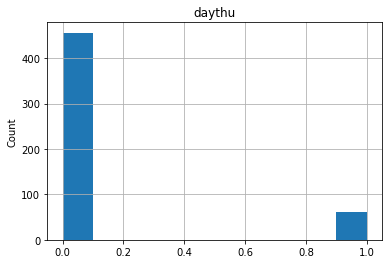

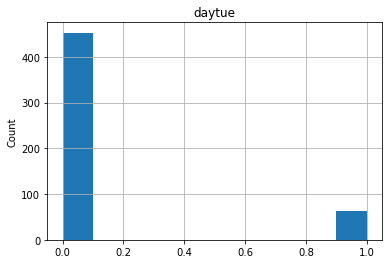

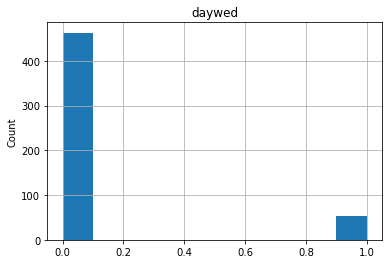

In [55]:
for i in data.iloc[:,9:16].columns:
    data.iloc[:,9:16][i].hist()
   
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

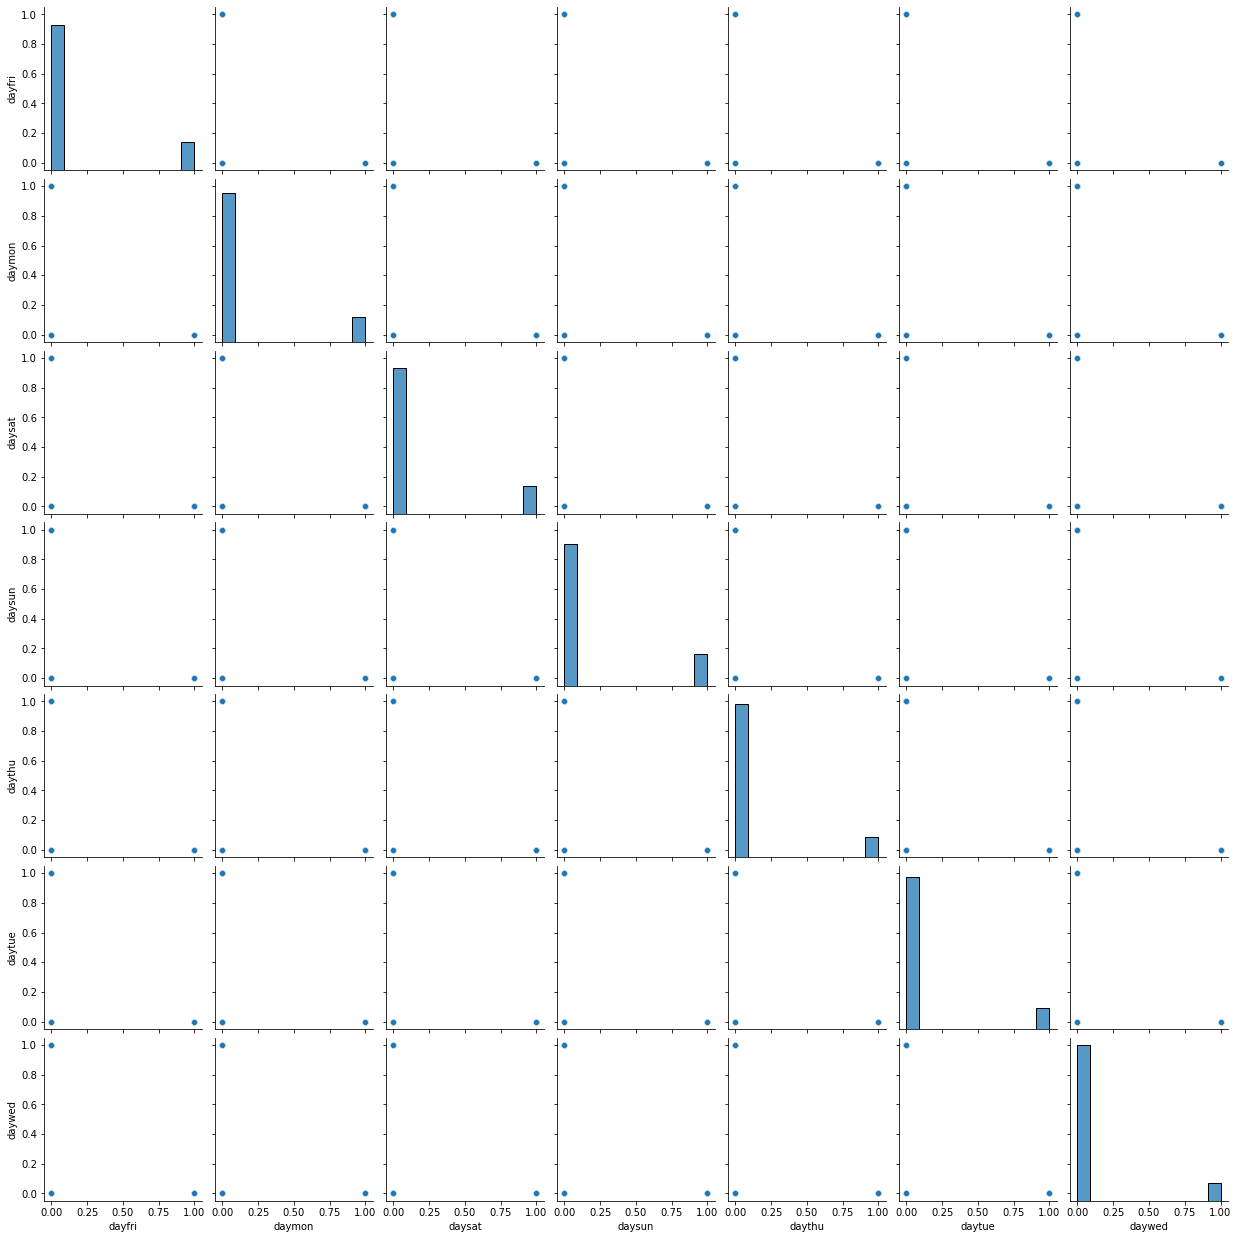

In [59]:
import seaborn as sns
sns.pairplot(data.iloc[:,9:16])

<AxesSubplot:xlabel='rain', ylabel='Density'>

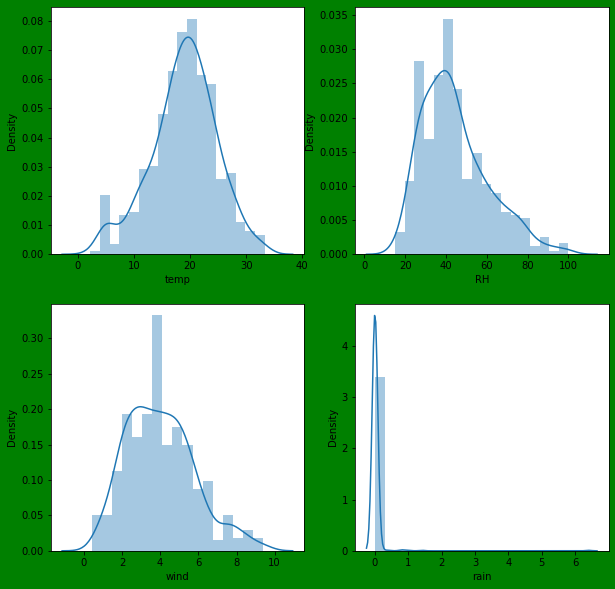

In [61]:
plt.figure(figsize=(10,10),facecolor='green')
plt.subplot(2,2,1)
sns.distplot(data['temp'])

plt.subplot(2,2,2)
sns.distplot(data['RH'])

plt.subplot(2,2,3)
sns.distplot(data['wind'])

plt.subplot(2,2,4)
sns.distplot(data['rain'])

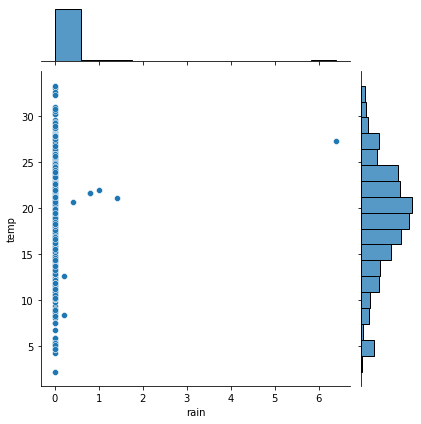

In [68]:
sns.jointplot(x='rain',y='temp',data=data)

In [13]:
x=data.iloc[:,0:28]
Y=data['size_category']

# Normalising the data

In [16]:
def norm(i):
    x=(i-i.min()/i.max()-i.min())
    return(x)

In [17]:
X=norm(x)

In [18]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,67.305613,25.096224,86.39082,5.1,5.933934,35.85,6.257447,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,71.705613,34.296224,661.19082,6.7,15.733934,17.85,0.457447,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,71.705613,42.596224,678.99082,6.7,12.333934,17.85,0.857447,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,72.805613,32.196224,69.59082,9.0,6.033934,81.85,3.557447,0.2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70.405613,50.196224,94.29082,9.6,9.133934,83.85,1.357447,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=40)

In [20]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((361, 28), (361,), (156, 28), (156,))

# SVM with GridSearch

# kernal=rbf

In [21]:

clf=SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1,1.0,15,11,10,2],'C':[0.1,0.001,0.5,1.0]}]

In [22]:
gsv=GridSearchCV(clf,parma_grid,cv=5)
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.001, 0.5, 1.0],
                          'gamma': [0.1, 1.0, 15, 11, 10, 2], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [23]:
gsv.best_params_,gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.7202435312024353)

In [24]:
acc=accuracy_score(gsv.predict(xtest),ytest)
acc

0.7756410256410257

# Kernal=Linear

In [25]:

model_lin = SVC(kernel = "linear")
model_lin.fit(xtrain,ytrain)

SVC(kernel='linear')

In [26]:
y_test_lin=model_lin.predict(xtest)

In [28]:
# summarize the fit of the model
from sklearn import metrics


print(metrics.classification_report(ytest, y_test_lin))
print(metrics.confusion_matrix(ytest, y_test_lin))



print("Accuracy:",metrics.accuracy_score(ytest, y_test_lin))
print("Precision:",metrics.precision_score(ytest, y_test_lin))
print("Recall:",metrics.recall_score(ytest, y_test_lin))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       0.95      1.00      0.97        36

    accuracy                           0.99       156
   macro avg       0.97      0.99      0.98       156
weighted avg       0.99      0.99      0.99       156

[[118   2]
 [  0  36]]
Accuracy: 0.9871794871794872
Precision: 0.9473684210526315
Recall: 1.0
